In [1]:
import numpy as np
import pandas as pd

https://en.wikipedia.org/wiki/Generalised_logistic_function

In [2]:
def sigmoid(x, A, K, B, Q, C, M):
    return (K - A)/(Q*np.exp(B * (x-M)) + C) + A

In [3]:
def sigmoid_odr(B, x):
    return (B[1] - B[0])/(B[3]*np.exp(B[2] * (x-B[5])) + B[4]) + B[0]

In [2]:
test_data = pd.read_csv('../HI&TOC/Quali/HI-Tmax_DB.csv', usecols=['Well','HI', 'Tmax', 'Age', "TOC", "S2"], sep=';')
test_data

,Well,TOC,S2,HI,Tmax,Age
0,7019/1-1,3.39,5.09,150.0,450,J3
1,7019/1-1,3.30,4.91,149.0,450,J3
2,7019/1-1,3.01,3.66,122.0,450,J3
3,7019/1-1,5.53,7.39,134.0,449,J3
4,7119/9-1,2.89,2.96,100.0,453,J3
...,...,...,...,...,...,...
3537,Pioner,0.58,0.76,131.0,424,D1
3538,Pioner,0.46,1.54,335.0,428,D1
3539,Figurniy,0.83,1.76,212.0,432,S1
3540,Figurniy,7.79,32.08,412.0,426,S1


In [2]:
base = pd.read_csv("../HI-Tmax plot.csv")

In [4]:
df = base.iloc[:, [2, 3]].dropna()
df.columns = ['Tmax', "HI"]

In [5]:
df

,Tmax,HI
0,418.9970,555.75380
1,419.0732,555.56850
2,419.1495,555.38270
3,419.2257,555.19690
4,419.3019,555.01090
...,...,...
1520,487.1319,16.52861
1521,487.2112,16.39065
1522,487.2906,16.25318
1523,487.3699,16.11619


In [6]:
# p0 = [20, 200, 2, 2, 1, 420]
p0 = [20, 800, 2, 2, 1, 420]
# p0 = [20, 1000, 3, 2, 1, 430]

In [9]:
left = df['Tmax'].round().min()
right = df['Tmax'].round().max()
Tmax_interp = np.concatenate([np.arange(left-100, left), df['Tmax'], np.arange(right, right+100)])
HI_interp = np.interp(Tmax_interp, df['Tmax'], df["HI"])

In [10]:
Tmax_interp

array([319., 320., 321., ..., 584., 585., 586.])

In [11]:
popt, pcov = curve_fit(sigmoid, Tmax_interp, HI_interp, p0=p0, maxfev=2000)

In [13]:
A, K, B, Q, C, M = popt

In [14]:
A, K, B, Q, C, M 

(26.582929123330498,
 796.1614157722134,
 0.20924300991965716,
 0.0018133606343203202,
 1.5179967570863686,
 422.60145248061286)

In [15]:
A + (K-A)/C

533.5527121984973

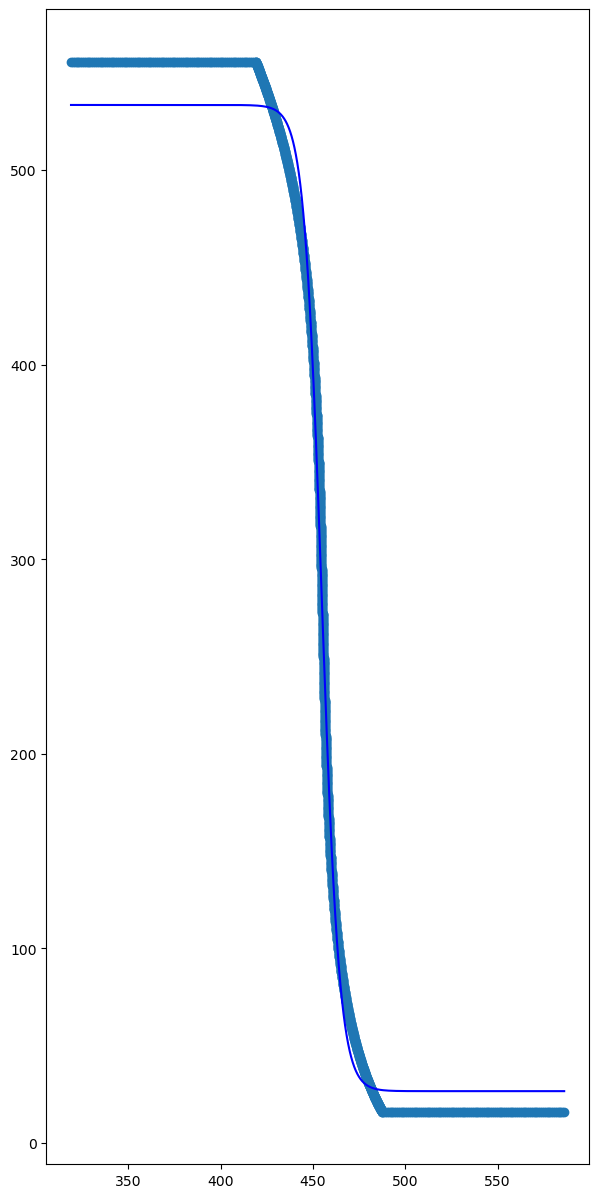

In [16]:
fig, ax = plt.subplots(figsize=(7, 15))
ax.scatter(Tmax_interp, HI_interp)
ax.plot(Tmax_interp, sigmoid(Tmax_interp, *popt), 'b-')
plt.show()

In [17]:
p0 = popt

In [18]:
exponential = odr.Model(sigmoid_odr)
data = odr.Data(Tmax_interp, HI_interp)
odr_obj = odr.ODR(data, exponential, beta0=p0)
output = odr_obj.run()

In [19]:
print(output.beta)
output.pprint()

[1.52369437e+01 8.82405982e+02 1.40864826e-01 2.05192897e-03
 1.60591082e+00 4.06447664e+02]
Beta: [1.52369437e+01 8.82405982e+02 1.40864826e-01 2.05192897e-03
 1.60591082e+00 4.06447664e+02]
Beta Std Error: [1.72610104e-01 6.18016585e+05 6.00917656e-04 2.14546496e+00
 1.14450520e+03 1.06224580e+04]
Beta Covariance: [[ 8.19812484e-03 -3.95706513e+02  1.10256749e-05  4.39508740e-04
  -7.32797549e-01  4.76297503e+00]
 [-3.95706513e+02  1.05095074e+11 -4.71403742e+00 -1.56145307e+05
   1.94625615e+08 -1.40056529e+09]
 [ 1.10256749e-05 -4.71403742e+00  9.93601019e-08  5.51876302e-06
  -8.72988544e-03  5.77172708e-02]
 [ 4.39508740e-04 -1.56145307e+05  5.51876302e-06  1.26655762e+00
  -2.89165533e+02  5.66014823e+03]
 [-7.32797549e-01  1.94625615e+08 -8.72988544e-03 -2.89165533e+02
   3.60427267e+05 -2.59370739e+06]
 [ 4.76297503e+00 -1.40056529e+09  5.77172708e-02  5.66014823e+03
  -2.59370739e+06  3.10478941e+07]]
Residual Variance: 3.6342759561234566
Inverse Condition #: 7.24018029663759

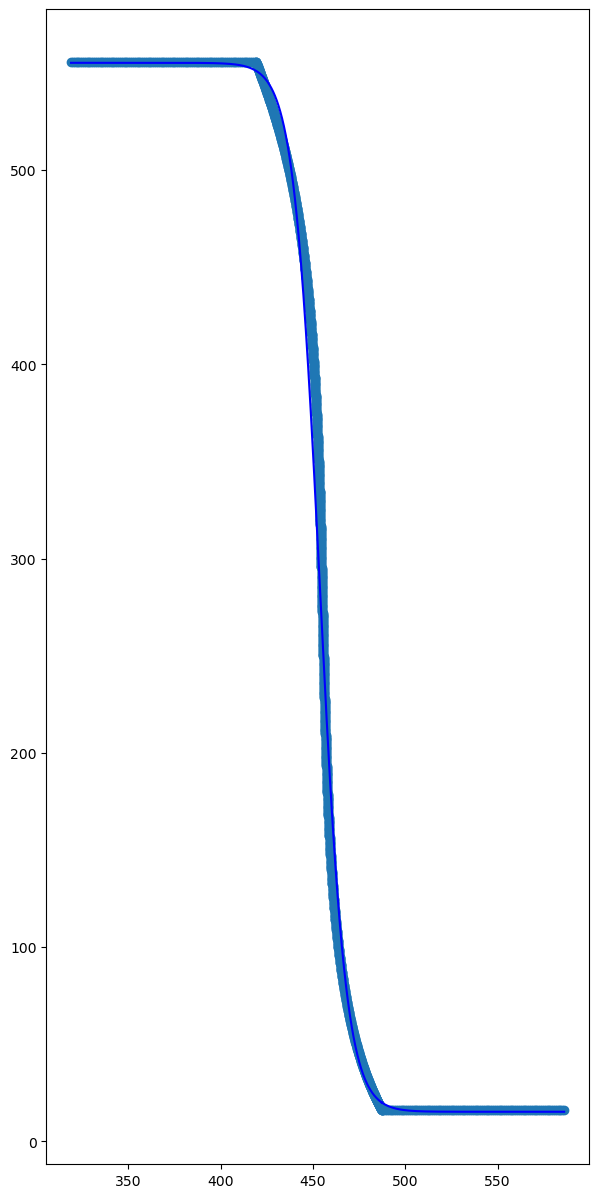

In [20]:
fig, ax = plt.subplots(figsize=(7, 15))
ax.scatter(Tmax_interp, HI_interp)
ax.plot(Tmax_interp, sigmoid_odr(output.beta, Tmax_interp), 'b-')
plt.show()

In [22]:
types = {
    "3": [15, 200, 2, 2, 1, 410],
    "2": [15, 600, 2, 2, 1, 420],
    "1": [15, 1000, 3, 2, 1, 430]
}
colors = ("r", "g", "b")

Text(0, 0.5, 'HI, мг УВ/г TOC')

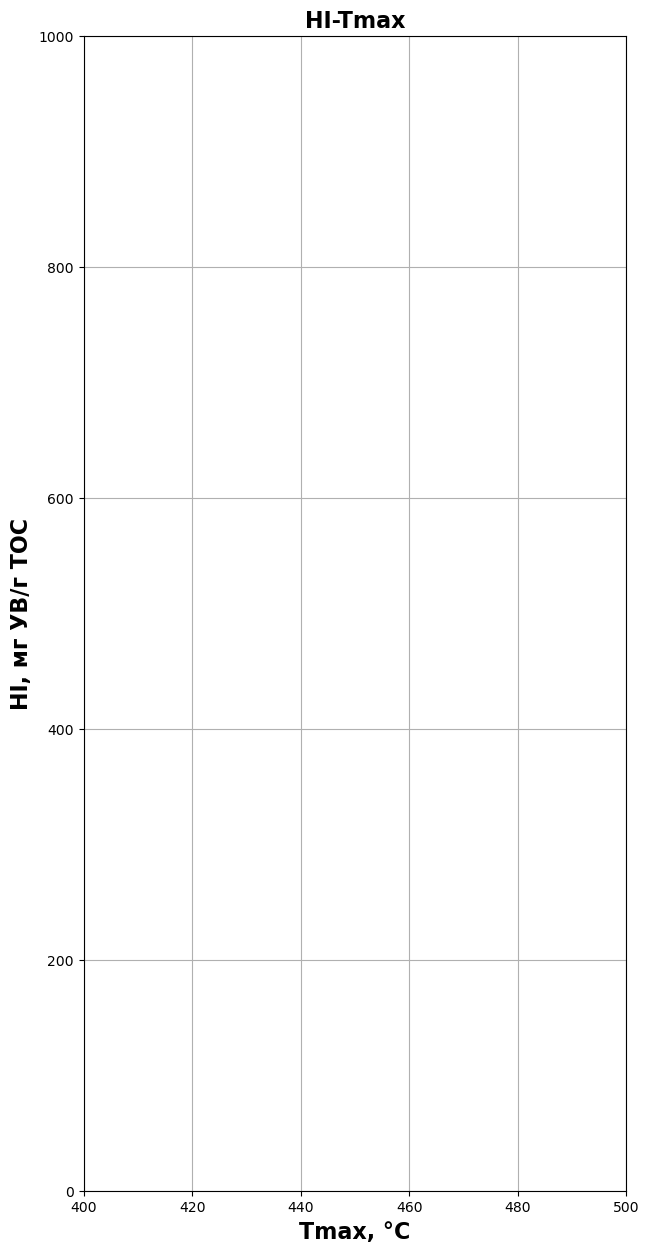

In [24]:
fig, ax1 = plt.subplots(figsize = (7, 15))
#Parameters for the first plot
ax1.set_title("HI-Tmax", fontweight='bold', fontsize = 16)
ax1.set_xlim((400, 500)), ax1.set_ylim((0, 1000))
ax1.grid(True, which = 'major', axis = 'both', linestyle = '-')
ax1.set_xlabel("Tmax, °C", fontweight = 'bold', fontsize = 16)
ax1.set_ylabel("HI, мг УВ/г TOC", fontweight = 'bold', fontsize = 16)

In [25]:
coefficients = []
for i in range (0, 5, 2):

    Tmax = base.iloc[:, i].dropna()
    HI = base.iloc[:, i+1].dropna()

    Tmax_interp = np.arange(400, 501)
    HI_interp = np.interp(Tmax_interp, Tmax, HI)

    p0 = types[str(i//2+1)]
    exponential = odr.Model(sigmoid_odr)
    data = odr.Data(Tmax_interp, HI_interp)
    odr_obj = odr.ODR(data, exponential, beta0=p0)
    output = odr_obj.run()
    coefficients.append(output.beta)
    print(output.beta)

    ax1.plot(Tmax_interp, HI_interp)
    ax1.plot(Tmax_interp, sigmoid_odr(output.beta, Tmax_interp), f'{colors[i//2]}-')

[3.26137525e+01 9.51975622e+02 5.53882799e-01 1.99981469e+00
 1.09055345e+00 4.55493896e+02]
[ 3.06228696e+02 -1.05347963e+07 -5.83638017e+01  1.36771382e+05
 -1.80081485e+04  4.36602820e+04]
[ 6.29410667e+01 -6.23491894e+06 -1.47073465e+01  6.56631414e+04
 -3.37018829e+04  3.36885736e+04]


C:\Users\glebi\AppData\Local\Temp\ipykernel_11976\2811820791.py:2: RuntimeWarning: overflow encountered in exp
  return (B[1] - B[0])/(B[3]*np.exp(B[2] * (x-B[5])) + B[4]) + B[0]


In [26]:
pd.DataFrame(coefficients, index=["Тип 1", "Тип 2", "Тип 3"], columns=["A", "K", "B", "Q", "C", "M"])

,A,K,B,Q,C,M
Тип 1,32.613753,9.519756e+02,0.553883,1.999815,1.090553,455.493896
Тип 2,306.228696,-1.053480e+07,-58.363802,136771.381848,-18008.148479,43660.281984
Тип 3,62.941067,-6.234919e+06,-14.707347,65663.141421,-33701.882894,33688.573557


Тестирование реальных значений из датасета на предмет возможности восстановить $HI_o$

In [27]:
df_age = test_data[(test_data['Well'] == '7120/2-2') & (test_data['Age'] == 'J3')]
Tmax = df_age['Tmax']
HI = df_age['HI']

In [28]:
p0

[15, 200, 2, 2, 1, 410]

In [29]:
left = df['Tmax'].round().min()
right = df['Tmax'].round().max()
Tmax_interp = np.concatenate([Tmax, np.arange(right, right+100)])
HI_interp = np.interp(Tmax_interp, Tmax, HI)

In [30]:
p0 = [20, 700, 1.34965704e-01, 1, 1.29293613e+00, 450]
popt, pcov = curve_fit(sigmoid, Tmax_interp, HI_interp, p0=p0, maxfev=2000)
model = odr.Model(sigmoid_odr)
test_data_odr = odr.RealData(Tmax_interp, HI_interp)
odr_test = odr.ODR(test_data_odr, model, beta0=popt)
output_test = odr_test.run()

C:\Users\glebi\AppData\Local\Temp\ipykernel_11976\935306631.py:2: RuntimeWarning: overflow encountered in exp
  return (K - A)/(Q*np.exp(B * (x-M)) + C) + A
g:\miniconda3\envs\nn\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [31]:
output_test.beta

array([ 1.62807107e+02, -8.87346810e+05,  1.05321544e-01, -3.83795596e+03,
       -1.68608458e+03, -1.83229050e+04])

In [32]:
output_test.pprint()

Beta: [ 1.62807107e+02 -8.87346810e+05  1.05321544e-01 -3.83795596e+03
 -1.68608458e+03 -1.83229050e+04]
Beta Std Error: [0.94083225 0.         0.         0.         0.         0.        ]
Beta Covariance: [[0.00507614 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Residual Variance: 174.37756828619771
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Both sum of squares and parameter convergence


In [33]:
ax1.plot(Tmax_interp, sigmoid_odr(output_test.beta, Tmax_interp), "y-")
ax1.scatter(Tmax, HI)

C:\Users\glebi\AppData\Local\Temp\ipykernel_11976\2811820791.py:2: RuntimeWarning: overflow encountered in exp
  return (B[1] - B[0])/(B[3]*np.exp(B[2] * (x-B[5])) + B[4]) + B[0]


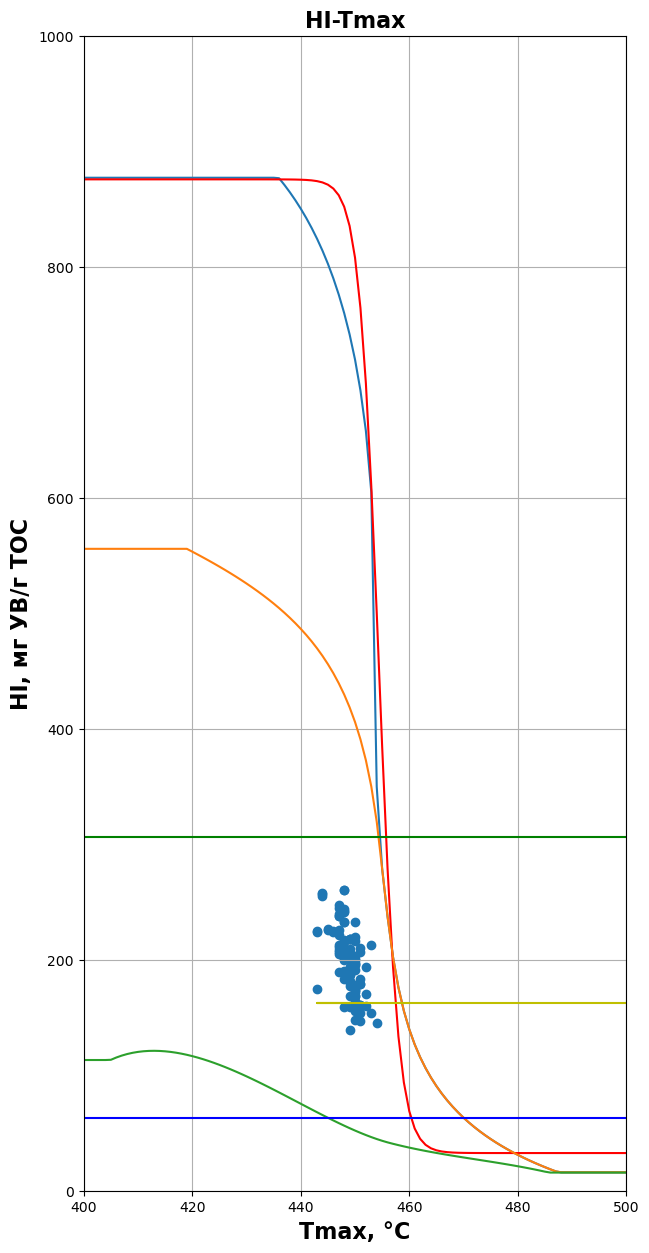

In [34]:
fig

In [35]:
A, K, B, Q, C, M = output_test.beta
A, K, B, Q, C, M 
A + (K-A)/C

689.1802368500224

In [36]:
A

162.80710659898477

Тесты того как определить кратчайшее расстояние от точки до кривой

In [4]:
file_path = "Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021.json"

In [3]:
file_path = "Chen, z & Lavoie, D & Jiang, Ch & Duchesne, M & Malo, M, 2016.json"

In [4]:
with open(file_path, "r", encoding="utf-8") as fp:
    init_dict = json.load(fp=fp)["data"]["curves"]

In [5]:
# x = base.iloc[:, 2]
# y = base.iloc[:, 3]

In [5]:
test_data.columns

Index(['Well', 'HI', 'Tmax', 'Age'], dtype='object')

In [41]:
df_age = test_data[(test_data['Well'] == '7120/2-2') & (test_data['Age'] == 'J3')]
Tmax = df_age['Tmax'].to_numpy()
HI = df_age['HI'].to_numpy()

In [8]:
df_age = test_data[(test_data['Well'] == '7120/2-2') & (test_data['Age'] == 'J3')]
TOC = df_age['TOC'].to_numpy()
S2 = df_age['S2'].to_numpy()

In [42]:
Tmax, HI

(array([449, 447, 445, 445, 447, 447, 450, 448, 444, 444, 448, 447, 449,
        447, 448, 448, 448, 447, 448, 447, 446, 446, 448, 447, 450, 447,
        448, 448, 449, 447, 450, 444, 448, 448, 450, 448, 451, 448, 447,
        447, 449, 447, 450, 448, 449, 449, 449, 453, 449, 449, 443, 443,
        450, 448, 451, 449, 448, 448, 450, 449, 443, 449, 450, 450, 452,
        450, 452, 451, 450, 450, 451, 449, 450, 450, 451, 448, 451, 451,
        453, 449, 449, 454, 452, 449, 449, 450, 450, 450, 450, 450, 450,
        449, 449, 448, 451, 451, 449]),
 array([139., 189., 226., 227., 205., 245., 233., 244., 257., 258., 217.,
        238., 209., 240., 260., 260., 210., 247., 202., 221., 225., 224.,
        183., 213., 195., 226., 233., 233., 204., 238., 216., 255., 242.,
        241., 203., 208., 210., 215., 207., 208., 159., 211., 220., 216.,
        218., 218., 177., 213., 194., 218., 224., 225., 178., 205., 207.,
        206., 201., 200., 172., 202., 175., 188., 196., 197., 160., 191.,
     

In [9]:
TOC, S2

(array([ 1.  ,  2.9 ,  4.8 ,  4.8 ,  3.92,  5.  ,  5.1 ,  4.8 ,  5.  ,
         5.  ,  4.06,  5.  ,  4.2 ,  4.4 ,  4.5 ,  4.5 ,  3.61,  4.  ,
         3.4 ,  3.9 ,  4.5 ,  4.5 ,  3.81,  4.9 ,  5.3 ,  4.7 ,  4.8 ,
         4.8 ,  3.86,  4.8 ,  4.8 ,  4.9 ,  4.6 ,  4.6 ,  3.75,  4.8 ,
         4.8 ,  4.9 ,  5.1 ,  5.1 ,  4.27,  5.4 ,  4.8 ,  5.1 ,  5.  ,
         5.  ,  4.01,  4.9 ,  4.8 ,  4.6 ,  4.4 ,  4.4 ,  3.58,  4.2 ,
         4.2 ,  4.1 ,  3.9 ,  3.9 ,  3.23,  3.7 ,  3.7 ,  3.8 ,  3.8 ,
         3.8 ,  3.2 ,  3.9 ,  3.5 ,  4.2 ,  4.2 ,  4.2 ,  3.55,  4.2 ,
         4.2 ,  4.2 ,  3.52,  4.2 ,  3.9 ,  3.9 ,  3.38,  4.1 ,  4.1 ,
         3.21,  4.  ,  3.8 ,  3.1 , 12.4 , 12.4 , 10.87, 12.2 , 12.2 ,
        10.87, 10.7 , 10.7 , 11.38, 12.6 , 12.6 , 10.46]),
 array([ 1.39,  5.47, 10.86, 10.9 ,  8.04, 12.23, 11.86, 11.73, 12.87,
        12.9 ,  8.8 , 11.92,  8.76, 10.57, 11.7 , 11.7 ,  7.59,  9.89,
         6.88,  8.62, 10.11, 10.1 ,  6.99, 10.46, 10.36, 10.64, 11.19,
        11.2 ,  7.

In [9]:
# np.nanargmin(distance, axis=1), np.nanmin(distance, axis=1)

In [44]:
P = np.column_stack((Tmax, HI))

In [10]:
P = np.column_stack((TOC, S2))

In [17]:
P = P[P[:, 0] < 6]

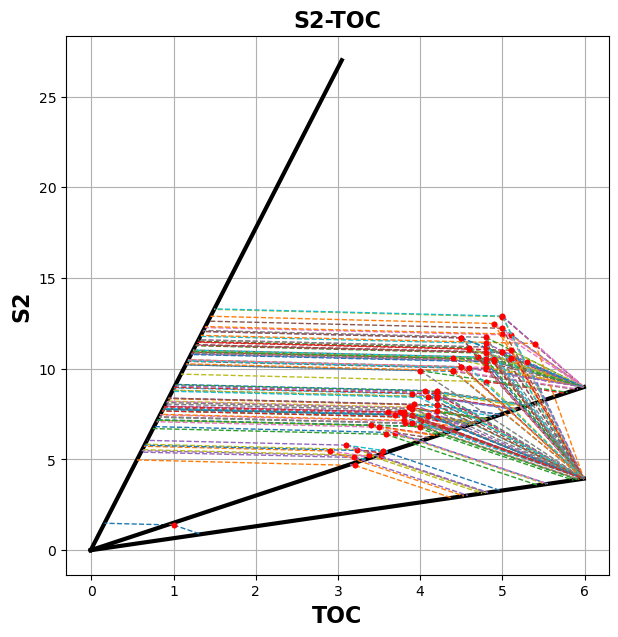

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
#Parameters for the first plot
ax.set_title("S2-TOC", fontweight='bold', fontsize = 16)
# ax.set(xlim=(400, 500), ylim=(0, 600))
# ax.axis('equal')
ax.grid(True, which = 'major', axis = 'both', linestyle = '-')
ax.set_xlabel("TOC", fontweight = 'bold', fontsize = 16)
ax.set_ylabel("S2", fontweight = 'bold', fontsize = 16)

for key, value in init_dict.items(): #1, 2, 3 curves
    if key.startswith("Ro"):
        continue
    x = value["points"]["x"]
    y = value["points"]["y"]
    ax.plot(x, y, 'k', linewidth = 3)
    distance = cdist(P, np.column_stack([x, y]))
    for p, i in zip(P, np.nanargmin(distance, axis=1)):
        ax.plot(
            [p[0], x[i]],
            [p[1], y[i]],
            '--', lw=1,
        )
        ax.plot(*p, '.r')
# ax.scatter(Tmax, HI)
plt.show()

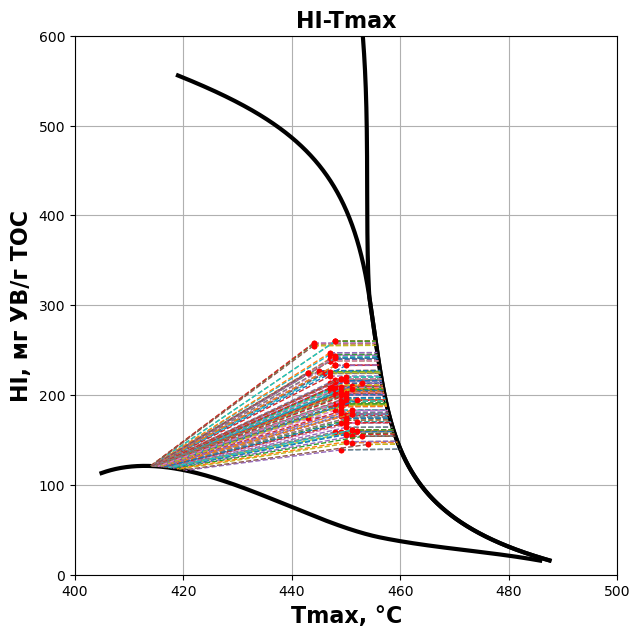

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
#Parameters for the first plot
ax.set_title("HI-Tmax", fontweight='bold', fontsize = 16)
ax.set(xlim=(400, 500), ylim=(0, 600))
# ax.axis('equal')
ax.grid(True, which = 'major', axis = 'both', linestyle = '-')
ax.set_xlabel("Tmax, °C", fontweight = 'bold', fontsize = 16)
ax.set_ylabel("HI, мг УВ/г TOC", fontweight = 'bold', fontsize = 16)

for i in range (0, 5, 2): #1, 2, 3 curves
    x = base.iloc[:, i]
    y = base.iloc[:, i+1]
    ax.plot(x, y, 'k', linewidth = 3)
    distance = cdist(P, np.column_stack([x, y]))
    for p, i in zip(P, np.nanargmin(distance, axis=1)):
        ax.plot(
            [p[0], x[i]],
            [p[1], y[i]],
            '--', lw=1,
        )
        ax.plot(*p, '.r')
# ax.scatter(Tmax, HI)
plt.show()

In [ ]:
# first = base.iloc[:, [0, 1]].dropna().to_numpy()
# second = base.iloc[:, [2, 3]].dropna().to_numpy()
# third = base.iloc[:, [4, 5]].dropna().to_numpy()

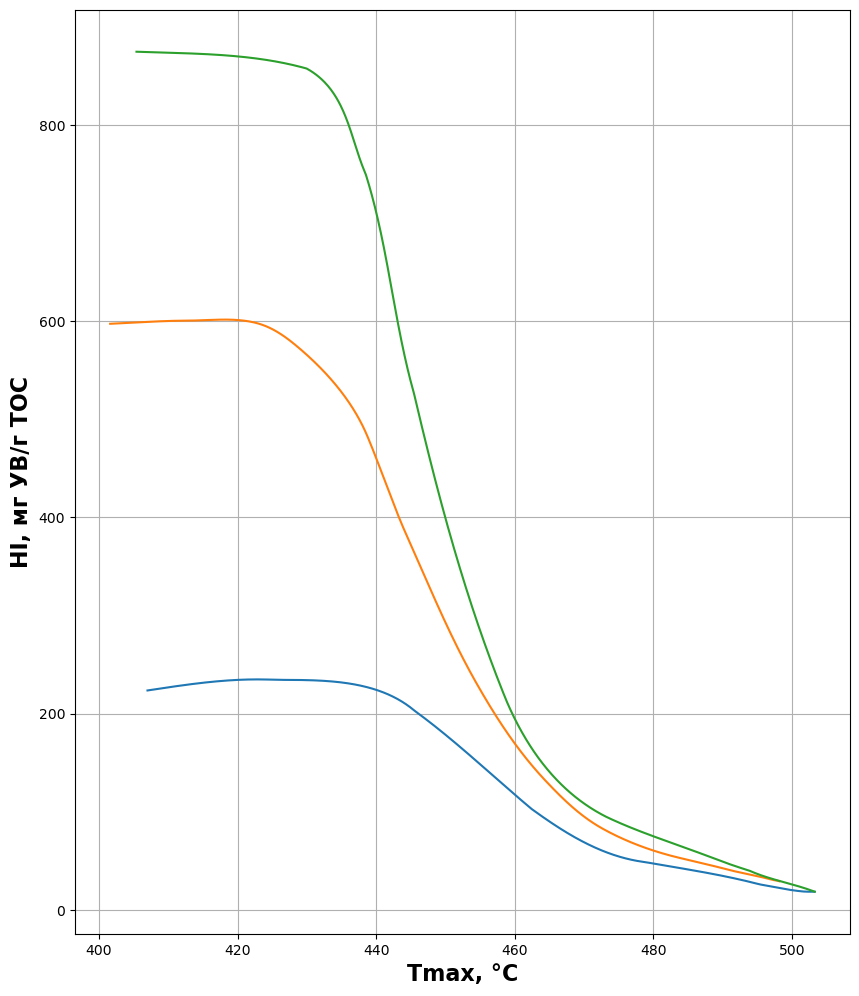

In [16]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.grid(True, axis = 'both', linestyle = '-')
ax.set_xlabel("Tmax, °C", fontweight = 'bold', fontsize = 16)
ax.set_ylabel("HI, мг УВ/г TOC", fontweight = 'bold', fontsize = 16)
for key, value in init_dict.items(): #1, 2, 3 curves
    if key.startswith("Ro"):
        continue
    Tmax = value["points"]["x"]
    HI = value["points"]["y"]
    ax.plot(Tmax, HI)

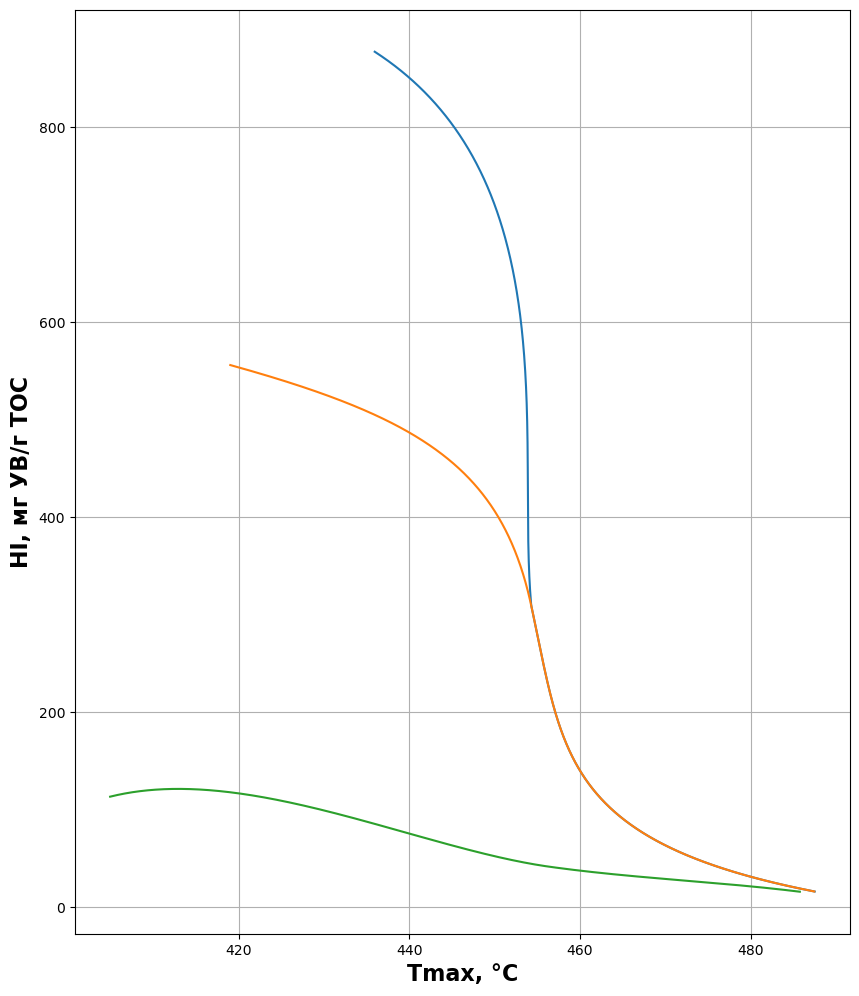

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.grid(True, axis = 'both', linestyle = '-')
ax.set_xlabel("Tmax, °C", fontweight = 'bold', fontsize = 16)
ax.set_ylabel("HI, мг УВ/г TOC", fontweight = 'bold', fontsize = 16)
for i in range (0, 5, 2):
    Tmax = base.iloc[:, i].dropna()
    HI = base.iloc[:, i+1].dropna()
    ax.plot(Tmax, HI)

In [ ]:
from shapely import LineString

In [44]:
def average_curves(curve_one, curve_two, ratios):
    if curve_one.intersects(curve_two):
        xy = curve_one.intersection(curve_two)

    curves = {}
    for ratio in ratios:
        curves[str(ratio)] = LineString(
            ratio * np.asarray(curve_one.coords) + (1 - ratio) * np.asarray(curve_two.coords)
        )

    return curves if len(curves) > 1 else tuple(curves.items())[0]

In [61]:
def densify_geometry(line, other):
    steps = np.linspace(0, 1, len(other.coords))

    return LineString(
        [line.interpolate(step, normalized=True) for step in steps]
    )

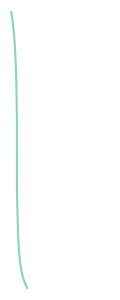

In [84]:
densify_geometry(one, one)

In [67]:
one = LineString(list(zip(base.iloc[:, 0].dropna(), base.iloc[:, 1].dropna())))
two = LineString(list(zip(base.iloc[:, 2].dropna(), base.iloc[:, 3].dropna())))
three = LineString(list(zip(base.iloc[:, 4].dropna(), base.iloc[:, 5].dropna())))

In [68]:
test = sorted(list(one.intersection(two).geoms), key=lambda x: x.xy[1], reverse=True)

ValueError: operands could not be broadcast together with shapes (2063,2) (1525,2) 

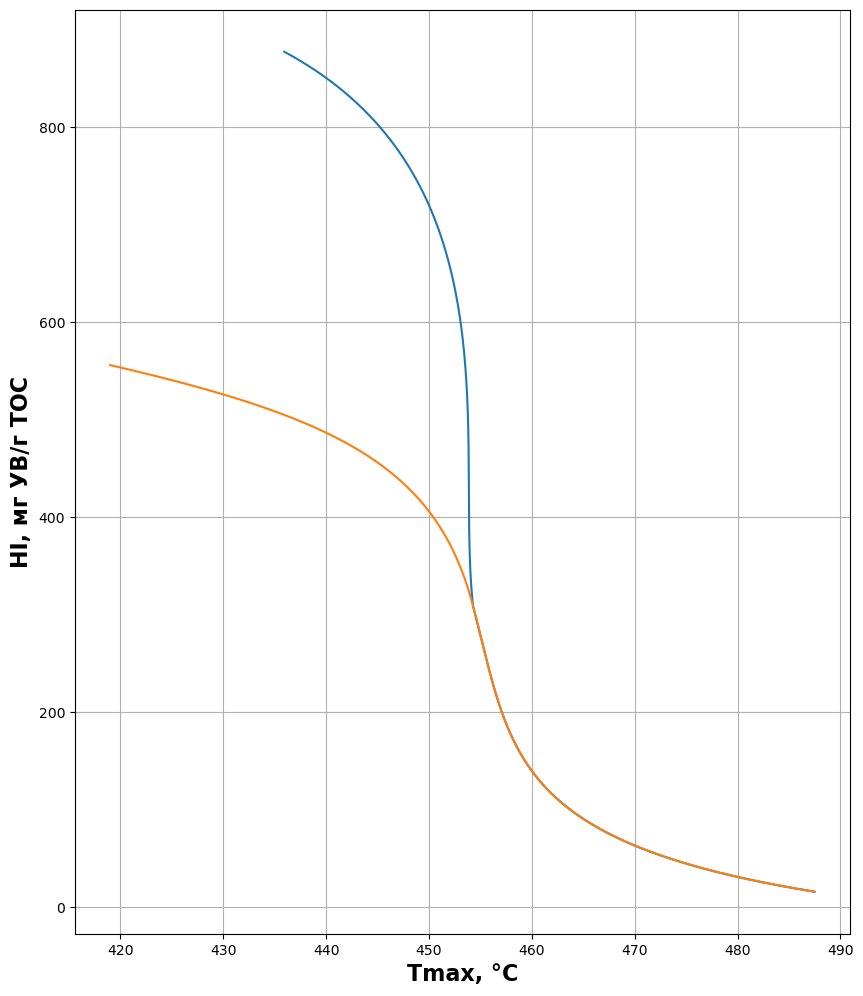

In [82]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.grid(True, axis = 'both', linestyle = '-')
ax.set_xlabel("Tmax, °C", fontweight = 'bold', fontsize = 16)
ax.set_ylabel("HI, мг УВ/г TOC", fontweight = 'bold', fontsize = 16)
for curve in (one, two):
    Tmax, HI = curve.coords.xy
    ax.plot(Tmax, HI)

# for t in test:
#     ax.plot(*t.xy, 'ro')

for c in average_curves(one, densify_geometry(one, two), np.linspace(0, 1, 10 + 1)).values():
    ax.plot(*c.xy, "--")

ax.plot(*test[0].xy, 'go')

In [17]:
print(one.intersects(two))
print(two.intersects(three))
print(three.intersects(one))

True
False
False
